<a href="https://colab.research.google.com/github/vinitoledo/Data-Science/blob/master/Airbnb/Analisando_os_Dados_do_Airbnb_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Buenos Aires

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2019-09-24/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de identificação de cada imóvel
* `name` - título da propriedade analisada
* `host_id` - número de id do host (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro ou vizinhança do imóvel
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido (quarto compartilhado, quarto individual, casa/apartamento completo)
* `price` - preço da diária do aluguel
* `minimum_nights` - quantidade mínima de noites para fazer uma reservar
* `number_of_reviews` - número de avaliações que a propriedade possui
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avalições por mês (média)
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião listados na plataforma
* `availability_365` - número de dias de disponibilidade dentro de 365 dias (ano)
Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7270,¡¡Great Loft in Palermo Hollywood!!,18822,Toni,NaN,Palermo,-34.58241,-58.43382,Entire home/apt,1930,20,14,2018-04-30,0.15,1,363
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58225,-58.42460,Entire home/apt,3406,2,25,2019-08-13,0.28,1,219
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1362,1,20,2017-12-11,0.17,1,365
3,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,2554,1,1,2018-12-18,0.11,7,365
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,2554,1,0,NaN,NaN,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [10]:
# identificar o volume de dados do DataFrame
print(f"Número de Variáveis {df.shape[0]}")
print(f"Número de Entradas {df.shape[1]}\n")
df.shape

# verificar as tipos das variáveis
display(df.dtypes)

display()

Número de Variáveis 21646
Número de Entradas 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [20]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.282038
last_review                       0.282038
name                              0.000508
host_name                         0.000277
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

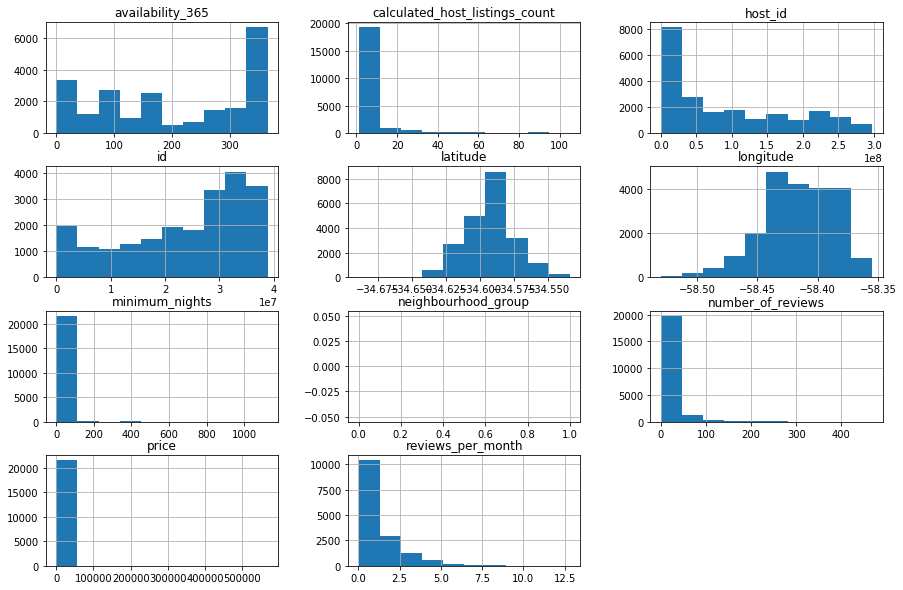

In [27]:
# plotar o histograma das variáveis numéricas
df.hist(bins=10, figsize=(15,10));

### **Q4. Há outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [32]:
# ver o resumo estatístico das variáveis numéricas
df[["price","minimum_nights","number_of_reviews","reviews_per_month", 
   "calculated_host_listings_count", "availability_365"]].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,21646.000000,21646.000000,21646.000000,15541.000000,21646.000000,21646.000000
mean,3063.981382,5.712649,14.999584,1.225433,6.325326,204.053405
std,11415.161124,21.091823,30.371003,1.355206,15.066936,133.973161
min,114.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1192.000000,1.000000,0.000000,0.260000,1.000000,85.000000
50%,1987.000000,3.000000,3.000000,0.750000,1.000000,188.500000
75%,3008.000000,4.000000,16.000000,1.730000,4.000000,348.000000
max,567545.000000,1125.000000,468.000000,12.820000,105.000000,365.000000


Observando os resultados acima, podemos confirmar alguns fenômenos:

* A variável `price` possui 75% dos seus valores abaixo de 3008, porém seu valor máximo é de 567545

* O desvio padrão das variáveis `price`, `minimum_nights`, `number_of_reviews` e `calculated_host_listings_count`está significativamente maior do que a média dos dados

* O máximo da variável `minimum_nights`está acima do limite real de 365 dias por ano

### Boxplot para minimum_nights

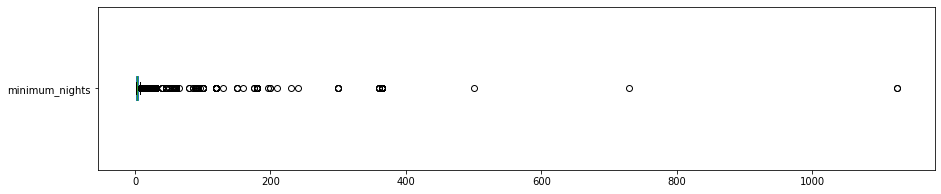

valores da variável minimum_nights acima de 30:
305 entradas
0.0141 %


In [53]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights

print(f"valores da variável minimum_nights acima de 30:\n{len(df[df.minimum_nights > 30])} entradas" )
print((format(len(df[df.minimum_nights > 30])/df.shape[0],'.4f')),'%')


### **Q4. Qual a correlação existente entre as variáveis**

In [0]:
# criar uma matriz de correlação

# mostrar a matriz de correlação


In [0]:
# plotar um heatmap a partir das correlações


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q6. Qual a localidade mais cara do dataset?**



In [0]:
# ver preços por bairros, na média


In [0]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``

## Conclusões
